In [9]:
import pandas as pd
import numpy as np
import pickle
import sys
sys.path.insert(0 , './../MAIN/')
from utils import *
import preprocess_functions
import networkx as nx

In [32]:
modality = 'miRNA'
target = 'paper_BRCA_Subtype_PAM50'

In [33]:
with open(f'./../../data/raw/{modality}_preprocessed.pkl' , 'rb') as file : 
    loaded_data = pickle.load(file)
    
count_mtx = loaded_data['datExpr']
datMeta = loaded_data['datMeta'].reset_index()[['patient' , target]].set_index('patient')

In [34]:
#pipeline = 'LogReg'
pipeline = 'DESeq'
data_to_save = {}

if len(set(count_mtx.index) & set(datMeta.index)) == 0 : 
    count_mtx = count_mtx.T

if pipeline == 'DESeq' :
    print('Performing Differential Gene Expression for Feature Selection')
    datMeta.index.name = 'index'

    count_mtx , datMeta = preprocess_functions.data_preprocess(count_mtx.astype(int).astype(np.float32), datMeta[target]  , gene_exp = False)

    dds, vsd, top_genes = preprocess_functions.DESEQ(count_mtx , datMeta , target , n_genes=500)

    data_to_save[f'extracted_feats'] = list(set(top_genes))
    datExpr = pd.DataFrame(data=vsd , index=count_mtx.index , columns=count_mtx.columns)
    
elif pipeline == 'LogReg' : 
    print('Performing Logistic Regression for Feature Selection')
    
    n_genes = count_mtx.shape[1]
    datExpr = count_mtx.loc[: , (count_mtx != 0).any(axis=0)] # remove any genes with all 0 expression
    
    extracted_feats , model , penalty = preprocess_functions.elastic_net(datExpr , datMeta[target] , n_feats=100, l1_ratio = 0.3)
    
    data_to_save['extracted_feats'] = list(set(extracted_feats))
    data_to_save['model'] = {'model' : model , 'penalty' : penalty}
    
    datMeta.index.name = 'index'
    datMeta = datMeta[target]
    
data_to_save['datExpr'] = datExpr
data_to_save['datMeta'] = datMeta

with open(f'./../../data/raw/{modality}_processed.pkl' , 'wb') as file : 
    pickle.dump(data_to_save , file)
    
if modality in ['mRNA'  , 'DNAm'] : 
    method = 'bicorr'
elif modality in [ 'RPPA' , 'miRNA' , 'CNV'] : 
    method = 'pearson'
elif modality in [] : 
    method = 'euclidean'

Performing Differential Gene Expression for Feature Selection
Keeping 967 Samples
Removed 48 Samples


Fitting size factors...
... done in 0.06 seconds.

Fitting dispersions...
... done in 3.33 seconds.

Fitting dispersion trend curve...
... done in 0.13 seconds.

Fitting MAP dispersions...
... done in 4.29 seconds.

Fitting LFCs...
... done in 2.05 seconds.

Refitting 0 outliers.

Running Wald tests...


Performing contrastive analysis for LumA vs. LumB


... done in 1.30 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs LumB
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
rownames                                                                
hsa-let-7a-1  14.332033        0.053837  0.032949  1.633953  0.102269   
hsa-let-7a-2  14.328910        0.053463  0.032950  1.622536  0.104689   
hsa-let-7a-3  14.343478        0.053643  0.032937  1.628659  0.103385   
hsa-let-7b    15.623521        0.060977  0.031584  1.930653  0.053526   
hsa-let-7c    11.982163        0.161408  0.036978  4.364993  0.000013   
...                 ...             ...       ...       ...       ...   
hsa-mir-95     3.528924       -0.012863  0.065975 -0.194959  0.845425   
hsa-mir-96     6.162769        0.015305  0.049815  0.307228  0.758670   
hsa-mir-98     6.918674       -0.029602  0.047070 -0.628895  0.529418   
hsa-mir-99a   10.186914        0.179495  0.040198  4.465262  0.000008   
hsa-mir-99b   16.142012       -0.032787  0.03068

... done in 1.32 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs Her2
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
rownames                                                                
hsa-let-7a-1  14.332033        0.080069  0.048090  1.665001  0.095912   
hsa-let-7a-2  14.328910        0.081112  0.048111  1.685914  0.091812   
hsa-let-7a-3  14.343478        0.081005  0.048088  1.684522  0.092081   
hsa-let-7b    15.623521        0.091963  0.046179  1.991433  0.046433   
hsa-let-7c    11.982163        0.053534  0.052042  1.028681  0.303630   
...                 ...             ...       ...       ...       ...   
hsa-mir-95     3.528924        0.054028  0.097192  0.555888  0.578287   
hsa-mir-96     6.162769        0.012285  0.071932  0.170785  0.864393   
hsa-mir-98     6.918674        0.015848  0.068834  0.230230  0.817913   
hsa-mir-99a   10.186914        0.073039  0.056640  1.289543  0.197209   
hsa-mir-99b   16.142012        0.005218  0.04477

... done in 1.54 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs Normal
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
rownames                                                                
hsa-let-7a-1  14.332033        0.005913  0.064445  0.091758  0.926891   
hsa-let-7a-2  14.328910        0.005539  0.064446  0.085947  0.931509   
hsa-let-7a-3  14.343478        0.006849  0.064444  0.106279  0.915361   
hsa-let-7b    15.623521        0.032064  0.062185  0.515620  0.606120   
hsa-let-7c    11.982163       -0.110024  0.067724 -1.624592  0.104249   
...                 ...             ...       ...       ...       ...   
hsa-mir-95     3.528924        0.041527  0.132814  0.312670  0.754531   
hsa-mir-96     6.162769        0.273055  0.107364  2.543265  0.010982   
hsa-mir-98     6.918674        0.003347  0.093994  0.035607  0.971596   
hsa-mir-99a   10.186914       -0.127465  0.072859 -1.749479  0.080208   
hsa-mir-99b   16.142012        0.045029  0.062

... done in 1.38 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs Basal
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
rownames                                                                
hsa-let-7a-1  14.332033        0.093474  0.036459  2.563788  0.010354   
hsa-let-7a-2  14.328910        0.093100  0.036460  2.553451  0.010666   
hsa-let-7a-3  14.343478        0.091476  0.036427  2.511182  0.012033   
hsa-let-7b    15.623521        0.091817  0.034868  2.633311  0.008456   
hsa-let-7c    11.982163        0.055429  0.039362  1.408170  0.159081   
...                 ...             ...       ...       ...       ...   
hsa-mir-95     3.528924       -0.030635  0.071795 -0.426706  0.669594   
hsa-mir-96     6.162769        0.086050  0.055562  1.548734  0.121446   
hsa-mir-98     6.918674       -0.043430  0.051265 -0.847173  0.396898   
hsa-mir-99a   10.186914        0.077661  0.042847  1.812540  0.069903   
hsa-mir-99b   16.142012        0.019414  0.0340

... done in 1.33 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumB vs Her2
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
rownames                                                                
hsa-let-7a-1  14.332033        0.026232  0.053462  0.490673  0.623658   
hsa-let-7a-2  14.328910        0.027649  0.053480  0.516987  0.605166   
hsa-let-7a-3  14.343478        0.027362  0.053456  0.511870  0.608742   
hsa-let-7b    15.623521        0.030985  0.051338  0.603556  0.546139   
hsa-let-7c    11.982163       -0.107874  0.058590 -1.841158  0.065598   
...                 ...             ...       ...       ...       ...   
hsa-mir-95     3.528924        0.066890  0.107505  0.622205  0.533807   
hsa-mir-96     6.162769       -0.003020  0.079976 -0.037756  0.969882   
hsa-mir-98     6.918674        0.045450  0.076177  0.596638  0.550749   
hsa-mir-99a   10.186914       -0.106456  0.063808 -1.668385  0.095239   
hsa-mir-99b   16.142012        0.038005  0.04956

... done in 1.43 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumB vs Normal
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
rownames                                                                
hsa-let-7a-1  14.332033       -0.047924  0.068547 -0.699137  0.484466   
hsa-let-7a-2  14.328910       -0.047924  0.068547 -0.699137  0.484466   
hsa-let-7a-3  14.343478       -0.046794  0.068543 -0.682696  0.494799   
hsa-let-7b    15.623521       -0.028913  0.066107 -0.437376  0.661839   
hsa-let-7c    11.982163       -0.271432  0.072877 -3.724537  0.000196   
...                 ...             ...       ...       ...       ...   
hsa-mir-95     3.528924        0.054390  0.140537  0.387011  0.698748   
hsa-mir-96     6.162769        0.257750  0.112911  2.282765  0.022444   
hsa-mir-98     6.918674        0.032949  0.099497  0.331158  0.740525   
hsa-mir-99a   10.186914       -0.306960  0.078561 -3.907292  0.000093   
hsa-mir-99b   16.142012        0.077816  0.065

... done in 1.43 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumB vs Basal
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
rownames                                                                
hsa-let-7a-1  14.332033        0.039637  0.043299  0.915418  0.359972   
hsa-let-7a-2  14.328910        0.039637  0.043299  0.915418  0.359972   
hsa-let-7a-3  14.343478        0.037833  0.043267  0.874414  0.381893   
hsa-let-7b    15.623521        0.030840  0.041459  0.743868  0.456956   
hsa-let-7c    11.982163       -0.105979  0.047685 -2.222484  0.026251   
...                 ...             ...       ...       ...       ...   
hsa-mir-95     3.528924       -0.017773  0.085238 -0.208506  0.834834   
hsa-mir-96     6.162769        0.070746  0.065644  1.077725  0.281157   
hsa-mir-98     6.918674       -0.013828  0.060768 -0.227551  0.819995   
hsa-mir-99a   10.186914       -0.101834  0.051954 -1.960076  0.049987   
hsa-mir-99b   16.142012        0.052201  0.0401

... done in 1.41 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Her2 vs Normal
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
rownames                                                                
hsa-let-7a-1  14.332033       -0.074156  0.076979 -0.963334  0.335380   
hsa-let-7a-2  14.328910       -0.075573  0.076992 -0.981568  0.326312   
hsa-let-7a-3  14.343478       -0.074156  0.076979 -0.963334  0.335380   
hsa-let-7b    15.623521       -0.059899  0.074196 -0.807305  0.419491   
hsa-let-7c    11.982163       -0.163558  0.081560 -2.005380  0.044922   
...                 ...             ...       ...       ...       ...   
hsa-mir-95     3.528924       -0.012501  0.157621 -0.079310  0.936786   
hsa-mir-96     6.162769        0.260770  0.124265  2.098503  0.035861   
hsa-mir-98     6.918674       -0.012501  0.111455 -0.112161  0.910696   
hsa-mir-99a   10.186914       -0.200504  0.088113 -2.275526  0.022874   
hsa-mir-99b   16.142012        0.039811  0.073

... done in 1.32 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Her2 vs Basal
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
rownames                                                                
hsa-let-7a-1  14.332033        0.013405  0.055694  0.240683  0.809800   
hsa-let-7a-2  14.328910        0.011988  0.055712  0.215180  0.829627   
hsa-let-7a-3  14.343478        0.010471  0.055674  0.188071  0.850821   
hsa-let-7b    15.623521       -0.000146  0.053421 -0.002724  0.997827   
hsa-let-7c    11.982163        0.001895  0.060124  0.031511  0.974862   
...                 ...             ...       ...       ...       ...   
hsa-mir-95     3.528924       -0.084663  0.111172 -0.761554  0.446326   
hsa-mir-96     6.162769        0.073765  0.083677  0.881551  0.378020   
hsa-mir-98     6.918674       -0.059278  0.078838 -0.751898  0.452112   
hsa-mir-99a   10.186914        0.004622  0.065509  0.070555  0.943752   
hsa-mir-99b   16.142012        0.014196  0.0516

... done in 1.33 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Normal vs Basal
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
rownames                                                                
hsa-let-7a-1  14.332033        0.087561  0.070302  1.245493  0.212951   
hsa-let-7a-2  14.328910        0.087561  0.070302  1.245493  0.212951   
hsa-let-7a-3  14.343478        0.084627  0.070287  1.204024  0.228580   
hsa-let-7b    15.623521        0.059753  0.067737  0.882139  0.377702   
hsa-let-7c    11.982163        0.165453  0.074115  2.232377  0.025590   
...                 ...             ...       ...       ...       ...   
hsa-mir-95     3.528924       -0.072162  0.143361 -0.503359  0.614712   
hsa-mir-96     6.162769       -0.187004  0.115562 -1.618217  0.105616   
hsa-mir-98     6.918674       -0.046777  0.101548 -0.460638  0.645058   
hsa-mir-99a   10.186914        0.205126  0.079948  2.565731  0.010296   
hsa-mir-99b   16.142012       -0.025615  0.06

Fitting dispersions...
... done in 2.92 seconds.

Fitting dispersion trend curve...
... done in 0.12 seconds.



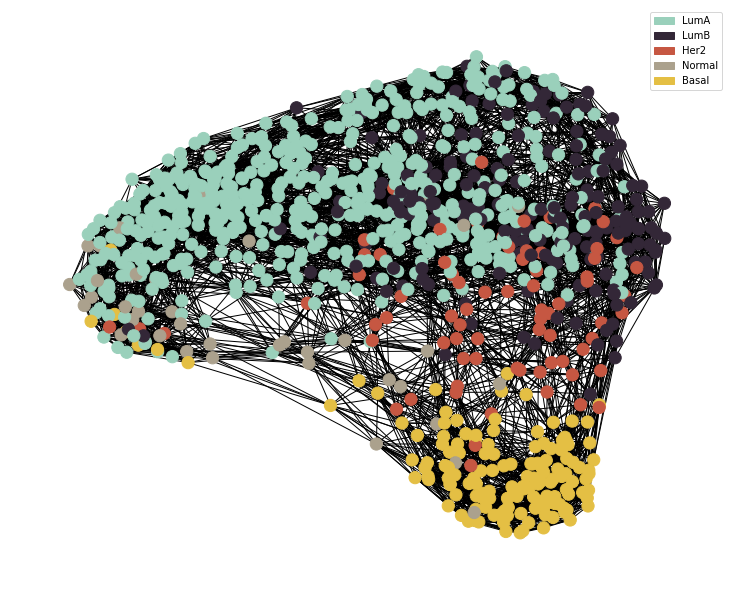

In [42]:
knn = 15
method = 'pearson'
if len(data_to_save['extracted_feats']) > 0 : 
    G  = preprocess_functions.knn_graph_generation(datExpr , datMeta , method=method , 
                                                extracted_feats=data_to_save['extracted_feats'], node_size =150 , knn = knn )
else : 
    G  = preprocess_functions.knn_graph_generation(datExpr , datMeta , target , method=method , 
                                    extracted_feats=None, node_size =150 , knn = 15 )
    
nx.write_graphml(G, f'./../../data/Networks/{modality}_graph.graphml')

In [20]:
G_R = network_from_csv('./../../data/raw/RPPA_graph.csv' , False)

In [21]:
len(G_R.nodes(data=True))

869

In [22]:
len(G.nodes())

869

In [23]:
len(G_R.edges)

8396

In [24]:
len(G.edges)

8318

In [25]:
G_R_nodes = pd.Series(nx.get_node_attributes(G_R , 'idx'))

G_R_edges = []
for e1 , e2 in G_R.edges : 
    G_R_edges.append((G_R_nodes[e1] , G_R_nodes[e2]))
    G_R_edges.append((G_R_nodes[e2] , G_R_nodes[e1]))

len(set(G_R_edges) & set(G.edges))

3153

In [28]:
len(set(G_R_nodes) & set(G.nodes))

869

In [29]:
len(G.edges)

8376

In [212]:
mat = datExpr.loc[: , sorted(top_feats)]
mat = mat - mat.mean(axis = 0)
adj = preprocess_functions.create_similarity_matrix(mat , method)

In [6]:
top_feats = pd.read_csv('./../../data/raw/rppa_top_feats.csv')['x']

In [213]:
dist_mtx = scipy.spatial.distance_matrix(adj.values ,  adj.values)
dist_mtx = pd.DataFrame(dist_mtx , index = adj.index , columns = adj.index)

In [165]:
import scipy

In [167]:
dist_mtx

,TCGA-BH-A18F,TCGA-B6-A0RH,TCGA-E9-A228,TCGA-E9-A1RF,TCGA-AO-A129,TCGA-AN-A0FT,TCGA-C8-A138,TCGA-A2-A4RX,TCGA-D8-A1JT,TCGA-BH-A0H5,...,TCGA-E2-A1LS,TCGA-EW-A1OZ,TCGA-A2-A0EW,TCGA-AO-A0J7,TCGA-AN-A0XS,TCGA-E9-A3X8,TCGA-AR-A1AQ,TCGA-AR-A0TS,TCGA-A8-A094,TCGA-BH-A0DV
TCGA-BH-A18F,0.000000,6.277066,5.257345,3.684795,17.274719,4.963391,4.821963,14.459833,4.941939,3.955092,...,14.516277,5.605804,5.513820,5.161340,3.776223,5.295972,17.752850,15.857238,10.715161,5.046799
TCGA-B6-A0RH,6.277066,0.000000,8.679798,7.832163,13.319332,6.159489,5.012796,10.887212,8.231327,8.885029,...,11.385068,6.459126,8.411362,9.296738,8.374349,8.095082,14.580904,12.842735,8.380674,7.268757
TCGA-E9-A228,5.257345,8.679798,0.000000,2.967199,18.014803,6.376658,7.125289,15.398096,3.252724,4.106629,...,14.562807,5.012593,6.506967,4.555246,4.206195,5.580007,17.792313,16.195001,11.540509,6.514803
TCGA-E9-A1RF,3.684795,7.832163,2.967199,0.000000,18.047118,5.572786,6.047791,15.431903,3.014944,2.908498,...,15.081003,4.947543,5.966144,4.402140,3.431515,5.185165,18.117939,16.478236,11.186656,6.001200
TCGA-AO-A129,17.274719,13.319332,18.014803,18.047118,0.000000,16.918342,15.365079,5.171933,17.483166,19.004049,...,6.122763,15.680290,18.075315,19.417870,19.457686,17.757019,3.946940,5.062444,8.642359,17.932960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E9-A3X8,5.295972,8.095082,5.580007,5.185165,17.757019,8.132362,7.996416,14.423828,6.421057,4.534728,...,14.084781,6.234655,3.548734,7.362871,4.703295,0.000000,17.771736,15.934640,11.633180,3.982325
TCGA-AR-A1AQ,17.752850,14.580904,17.792313,18.117939,3.946940,17.614241,16.116428,5.881353,17.459930,18.924105,...,5.818257,15.815139,18.238142,19.578734,19.640753,17.771736,0.000000,4.162677,8.889028,18.285294
TCGA-AR-A0TS,15.857238,12.842735,16.195001,16.478236,5.062444,15.766735,14.449332,4.397818,15.827574,17.076431,...,4.399073,14.152023,16.189174,17.941161,17.724098,15.934640,4.162677,0.000000,7.931111,16.110851
TCGA-A8-A094,10.715161,8.380674,11.540509,11.186656,8.642359,10.246047,8.195469,7.816169,10.483751,11.879124,...,8.154080,9.142635,12.150360,12.421427,12.898743,11.633180,8.889028,7.931111,0.000000,12.494098


In [175]:
neighbors = dist_mtx.loc['TCGA-BH-A18F'].nsmallest(15 + 1).index.tolist()[1:]  

In [176]:
neighbors

['TCGA-BH-A0BJ',
 'TCGA-A2-A0T7',
 'TCGA-A8-A07F',
 'TCGA-AR-A24S',
 'TCGA-A7-A425',
 'TCGA-E2-A15D',
 'TCGA-E9-A249',
 'TCGA-A2-A0T6',
 'TCGA-AC-A5XS',
 'TCGA-BH-A1EW',
 'TCGA-EW-A1J5',
 'TCGA-D8-A1XY',
 'TCGA-BH-A18H',
 'TCGA-LL-A9Q3',
 'TCGA-D8-A1XR']

In [179]:
edge = G_R_edges[0]

In [197]:
G_R_edges

[('TCGA-BH-A18F', 'TCGA-AO-A0J5'),
 ('TCGA-AO-A0J5', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-D8-A27N'),
 ('TCGA-D8-A27N', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-BH-A0BJ'),
 ('TCGA-BH-A0BJ', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-AC-A5XS'),
 ('TCGA-AC-A5XS', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-BH-A1EW'),
 ('TCGA-BH-A1EW', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-BH-A2L8'),
 ('TCGA-BH-A2L8', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-E9-A22A'),
 ('TCGA-E9-A22A', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-BH-A42V'),
 ('TCGA-BH-A42V', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-D8-A1XM'),
 ('TCGA-D8-A1XM', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-A2-A0T6'),
 ('TCGA-A2-A0T6', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-AR-A24S'),
 ('TCGA-AR-A24S', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-D8-A1XY'),
 ('TCGA-D8-A1XY', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-BH-A0BR'),
 ('TCGA-BH-A0BR', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-A2-A0EV'),
 ('TCGA-A2-A0EV', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'T

In [186]:
list(G.edges)

[('TCGA-BH-A18F', 'TCGA-BH-A0BJ'),
 ('TCGA-BH-A18F', 'TCGA-A2-A0T7'),
 ('TCGA-BH-A18F', 'TCGA-A8-A07F'),
 ('TCGA-BH-A18F', 'TCGA-AR-A24S'),
 ('TCGA-BH-A18F', 'TCGA-A7-A425'),
 ('TCGA-BH-A18F', 'TCGA-E2-A15D'),
 ('TCGA-BH-A18F', 'TCGA-E9-A249'),
 ('TCGA-BH-A18F', 'TCGA-A2-A0T6'),
 ('TCGA-BH-A18F', 'TCGA-AC-A5XS'),
 ('TCGA-BH-A18F', 'TCGA-BH-A1EW'),
 ('TCGA-BH-A18F', 'TCGA-EW-A1J5'),
 ('TCGA-BH-A18F', 'TCGA-D8-A1XY'),
 ('TCGA-BH-A18F', 'TCGA-BH-A18H'),
 ('TCGA-BH-A18F', 'TCGA-LL-A9Q3'),
 ('TCGA-BH-A18F', 'TCGA-D8-A1XR'),
 ('TCGA-BH-A18F', 'TCGA-BH-A0BR'),
 ('TCGA-BH-A18F', 'TCGA-B6-A0I8'),
 ('TCGA-BH-A18F', 'TCGA-A2-A0EV'),
 ('TCGA-B6-A0RH', 'TCGA-BH-A1EX'),
 ('TCGA-B6-A0RH', 'TCGA-AR-A0TX'),
 ('TCGA-B6-A0RH', 'TCGA-A8-A084'),
 ('TCGA-B6-A0RH', 'TCGA-BH-A1EV'),
 ('TCGA-B6-A0RH', 'TCGA-D8-A1JF'),
 ('TCGA-B6-A0RH', 'TCGA-D8-A1J9'),
 ('TCGA-B6-A0RH', 'TCGA-A8-A09G'),
 ('TCGA-B6-A0RH', 'TCGA-D8-A1XJ'),
 ('TCGA-B6-A0RH', 'TCGA-A8-A076'),
 ('TCGA-B6-A0RH', 'TCGA-BH-A1FN'),
 ('TCGA-B6-A0RH', 'T

In [187]:
edge

('TCGA-BH-A18F', 'TCGA-AO-A0J5')

In [185]:
edge in list(G.edges)

False

In [188]:
edge[::-1] in list(G.edges)

False

In [ ]:
for edge in G_R_edges : 
    if edge

In [193]:
G_R_edges

[('TCGA-BH-A18F', 'TCGA-AO-A0J5'),
 ('TCGA-AO-A0J5', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-D8-A27N'),
 ('TCGA-D8-A27N', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-BH-A0BJ'),
 ('TCGA-BH-A0BJ', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-AC-A5XS'),
 ('TCGA-AC-A5XS', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-BH-A1EW'),
 ('TCGA-BH-A1EW', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-BH-A2L8'),
 ('TCGA-BH-A2L8', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-E9-A22A'),
 ('TCGA-E9-A22A', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-BH-A42V'),
 ('TCGA-BH-A42V', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-D8-A1XM'),
 ('TCGA-D8-A1XM', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-A2-A0T6'),
 ('TCGA-A2-A0T6', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-AR-A24S'),
 ('TCGA-AR-A24S', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-D8-A1XY'),
 ('TCGA-D8-A1XY', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-BH-A0BR'),
 ('TCGA-BH-A0BR', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'TCGA-A2-A0EV'),
 ('TCGA-A2-A0EV', 'TCGA-BH-A18F'),
 ('TCGA-BH-A18F', 'T